In [1]:
#import the lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import LabelEncoder


In [2]:
data=pd.read_csv("/content/Crop_recommendation.csv")
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.9355362,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.6555374,rice
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.9642476,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.8640342,rice
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.7173405,rice


In [3]:
#dimensions
data.shape

(2200, 8)

In [4]:
#count no of classes
count_classes=pd.value_counts(data['label'],sort=True)
count_classes

mango          100
banana         100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
maize          100
coffee         100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
watermelon      99
grapes          98
pomegranate     97
rice            95
Name: label, dtype: int64

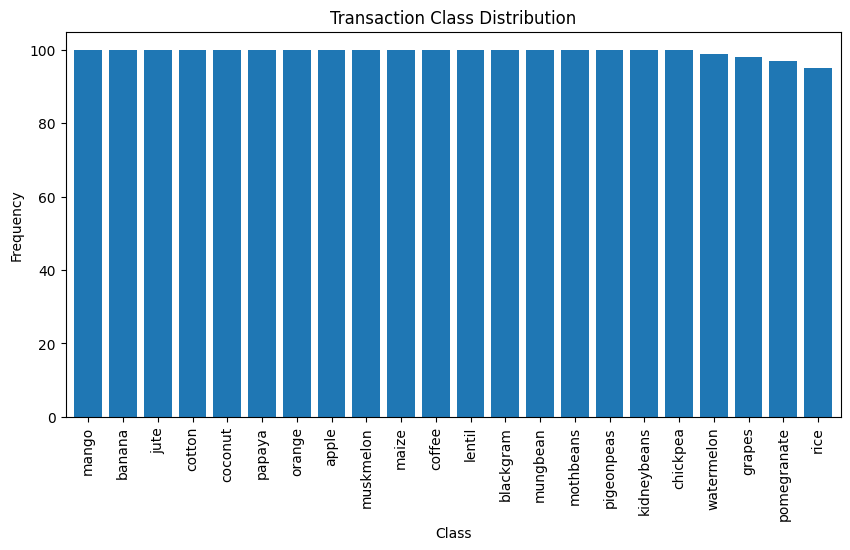

In [5]:
#plot the different class counts
plt.figure(figsize=(10, 5))  # Set the figure size to (width, height)
count_classes.plot(kind='bar', rot=0, width=0.8)  # Adjust width as per your preference
plt.title("Transaction Class Distribution")
plt.xticks(rotation='vertical')  # Rotate x-axis ticks vertically
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()


In [6]:
#separate different classes
mango=data[data['label']=="mango"]
banana=data[data['label']=="banana"]
jute=data[data['label']=="jute"]
cotton=data[data['label']=="cotton"]
coconut=data[data['label']=="coconut"]
papaya=data[data['label']=="papaya"]
orange=data[data['label']=="orange"]
apple=data[data['label']=="apple"]
muskmelon=data[data['label']=="muskmelon"]
maize=data[data['label']=="maize"]
coffee=data[data['label']=="coffee"]
lentil=data[data['label']=="lentil"]
blackgram=data[data['label']=="blackgram"]
mungbean=data[data['label']=="mungbean"]
mothbeans=data[data['label']=="mothbeans"]
pigeonpeas=data[data['label']=="pigeonpeas"]
kidneybeans=data[data['label']=="kidneybeans"]
chickpea=data[data['label']=="chickpea"]
watermelon=data[data['label']=="watermelon"]
grapes=data[data['label']=="grapes"]
pomegranate=data[data['label']=="pomegranate"]
rice=data[data['label']=="rice"]

In [7]:
#features and target
features=data.drop(['label'],axis='columns')
target=data["label"]

In [8]:
# Convert numerical columns to numeric data type
numeric_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for column in numeric_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Drop rows with NaN values
data.dropna(inplace=True)

# Encode categorical label into numerical values
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

# Separate features and target
features = data.drop(['label'], axis=1)
target = data["label"]

# Apply SMOTE to balance the dataset
smtk = SMOTETomek()
x_res, y_res = smtk.fit_resample(features, target)

# Convert the balanced dataset back to DataFrame
balanced_data = pd.DataFrame(x_res, columns=features.columns)
balanced_data['label'] = y_res

# Decode numerical labels back to categorical
balanced_data['label'] = label_encoder.inverse_transform(balanced_data['label'])

Text(0, 0.5, 'Frequency')

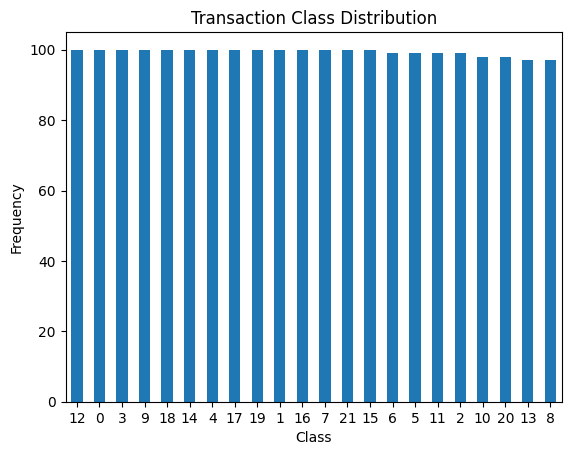

In [9]:
#now plot again
count_classes=pd.value_counts(y_res,sort=True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
# plt.xticks(range(5))
plt.xlabel("Class")
plt.ylabel("Frequency")

In [10]:
count_classes=pd.value_counts(y_res,sort=True)
count_classes

12    100
0     100
3     100
9     100
18    100
14    100
4     100
17    100
19    100
1     100
16    100
7     100
21    100
15    100
6      99
5      99
11     99
2      99
10     98
20     98
13     97
8      97
Name: label, dtype: int64

In [11]:
# save the resampled data
x_res.to_csv("x_resampled.csv")
y_res.to_csv("y_resampled.csv")

In [12]:
x_res

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.000000,42.000000,43.000000,20.879744,82.002744,6.502985,202.935536,rice
1,85.000000,58.000000,41.000000,21.770462,80.319644,7.038096,226.655537,rice
2,60.000000,55.000000,44.000000,23.004459,82.320763,7.840207,263.964248,rice
3,74.000000,35.000000,40.000000,26.491096,80.158363,6.980401,242.864034,rice
4,78.000000,42.000000,42.000000,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2181,97.083898,58.916102,42.664407,26.375979,83.923780,6.272819,271.398100,rice
2182,117.916353,30.000000,49.541823,25.110492,84.115372,6.817383,47.109222,watermelon
2183,86.085016,26.943323,53.028339,25.213692,86.552724,6.523916,47.564264,watermelon
2184,97.688261,12.207826,48.655869,26.144433,83.870092,6.729156,56.880853,watermelon


In [13]:
y_res

0       20
1       20
2       20
3       20
4       20
        ..
2181    20
2182    21
2183    21
2184    21
2185    21
Name: label, Length: 2186, dtype: int64